<a href="https://colab.research.google.com/github/laurisolivares-dev/netflix-tvshow-data-analysis-/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📺 Análisis del Catálogo de Netflix: Enfoque en TV Shows

## 🎯 Objetivo
Este proyecto realiza un análisis exploratorio de datos (EDA) sobre el catálogo de títulos tipo "TV Show" disponibles en Netflix, utilizando Python, pandas, matplotlib y seaborn. El enfoque principal es visualizar la evolución de las categorías a lo largo del tiempo.

Este proyecto utiliza Python (Pandas, Matplotlib, Seaborn) y el dataset `netflix_titles.csv` de Kaggle.

## 👩‍💻 Autora: Lauris Olivares  
## 📆 Fecha: Julio 2025



##Importamos las librerías
##Se hace el proceso de importar las librerías con que vamos a trabajar, que son:


*   pandas
*   numpy
*   matplotlib.pyplot
*   seaborn





In [10]:
# Importar librerías esenciales para análisis y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Configurar estética para gráficos
sns.set(style="whitegrid")


## Carga del dataset
## Como estamos usando Google Colab, primero debemos subir tu archivo netflix_titles.csv desde tu computadora:

In [14]:
#Montamos el archivo  netflix_titles.csv desde tu computadora, es decir localmente:


from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [15]:
#Carga del dataset de Netflix
#En esta sección se carga el archivo `netflix_titles.csv` para comenzar el análisis.

df = pd.read_csv('netflix_titles.csv')

#Muestra las primeras filas
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##EXPLORACIÓN INICIAL
## Se hace la exploración inicial del dataset, donde se comprueba la información general del dataset.

In [50]:
#Exploración inicial del dataset, comprobación de la información general del dataset

#Información General
print("1.Información General:\n")
df.info()

#Dimensiones del dataset
print('\n2.Dimensiones del dataset:',)
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

#Conteo de valores nulos por columna
print('\n3.Conteo de valores nulos por columna:\n',df.isnull().sum())


#Valores únicos por columna
print('\n4.Valores únicos por columna:\n',df.nunique())


#Ver algunas categorías únicas de 'type', 'rating' o 'listed_in'
print("\n5.Observamos algunas categorías únicas:\n")
print("Tipos de contenido:\n", df['type'].unique())
print("Ratings disponibles:\n", df['rating'].unique())
print("Ejemplos de categorías:\n", df['listed_in'].dropna().sample(5).values)




1.Información General:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

2.Dimensiones del dataset:
Filas: 8807, Columnas: 12

3.Conteo de valores nulos por columna:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_ad

## LIMPIEZA DE DATOS
## Para este proceso sólo trabajamos con los TV Shows, donde se convertimos la fecha en año, y limpiamos los valores nulos.


In [55]:
# Filtrar solo los registros tipo TV Show
df_tv = df[df['type'] == 'TV Show'].copy()

#Convertir 'date_added' a tipo datetime
df_tv['date_added'] = pd.to_datetime(df_tv['date_added'], errors='coerce')

# Crear columna con el año en que fue agregado a Netflix
df_tv['año_agregado'] = df_tv['date_added'].dt.year


##Eliminar valores nulos que afectan el análisis

# Eliminar filas con valores nulos en columnas clave
df_tv = df_tv.dropna(subset=['listed_in', 'año_agregado'])

# Convertir año a entero (por si quedó como float)
df_tv['año_agregado'] = df_tv['año_agregado'].astype(int)

print ("Vista del número de TV Shows agregados por año.\n")
df_tv['año_agregado'].value_counts().sort_index()




Vista del número de TV Shows agregados por año.



,count
año_agregado,
2008,1
2013,4
2014,4
2015,17
2016,165
2017,325
2018,388
2019,575
2020,594


##ANÁLISIS: Agrupación por año y categoría
##Observamos que la columna listed_in contiene múltiples categorías separadas por comas (por ejemplo: "Children & Family Movies, Comedies"). Vamos a separarlas para analizarlas individualmente.

## En este proceso generamos los siguiente:


*   Separación de múltiples categorías.
*   Se genera por medio de la funsión Explode: una fila por cada categoría individual.
*   Agrupamos por año y categoría, y contamos.
*   Ordenarmos por año y cantidad.






In [56]:
#Separación de múltiples categorías
df_tv['listed_in'] = df_tv['listed_in'].str.split(', ')

#Se genera por medio de la funsión Explode: una fila por cada categoría individual
df_explotado = df_tv.explode('listed_in')

#Agrupamos por año y categoría, y contar
categoria_por_año = df_explotado.groupby(['año_agregado', 'listed_in']).size().reset_index(name='cantidad')

#Ordenarmos por año y cantidad
categoria_por_año = categoria_por_año.sort_values(by=['año_agregado', 'cantidad'], ascending=[True, False])


##VISUALIZACIÓN: Top 5 categorías por año.


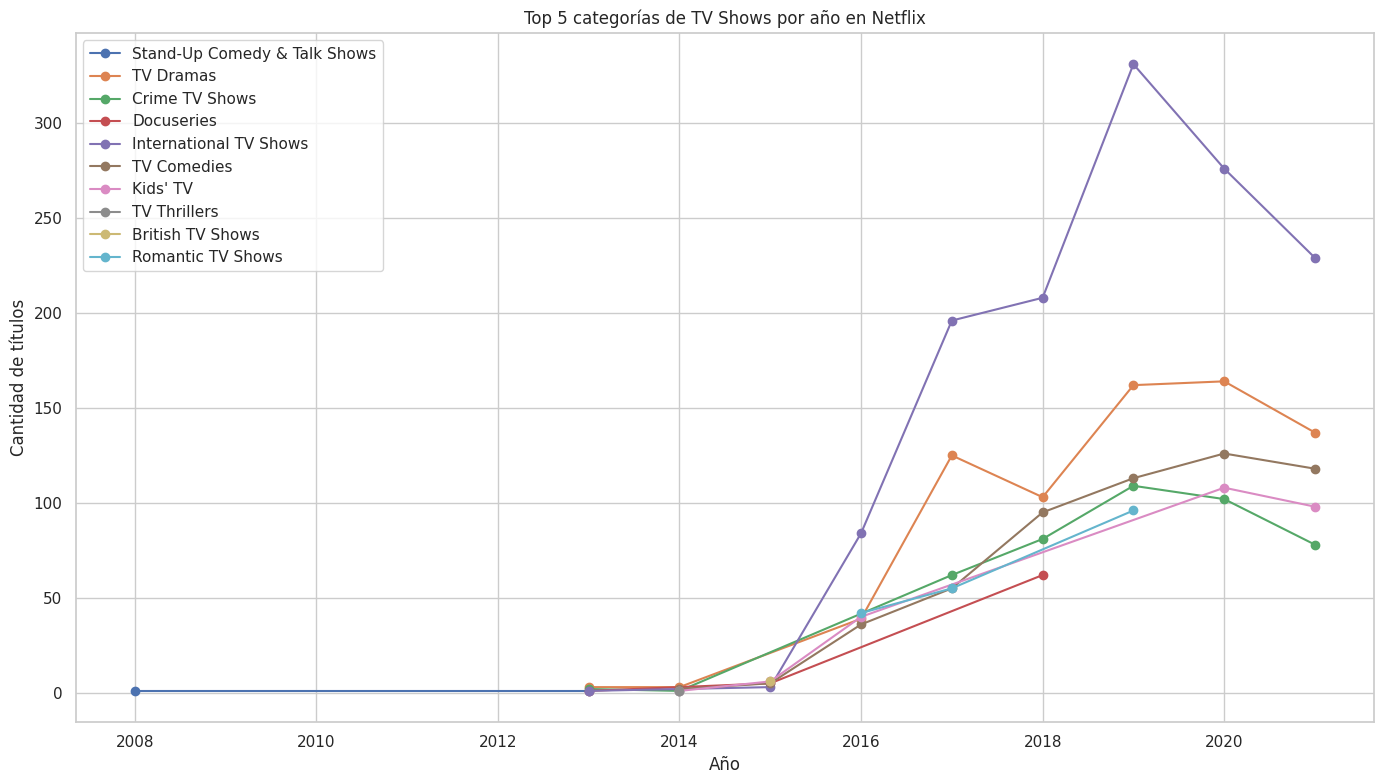

In [57]:
plt.figure(figsize=(14, 8))

#Seleccionamos las 5 más frecuentes por año
top5_por_año = categoria_por_año.groupby('año_agregado').head(5)

#Graficar cada categoría
for categoria in top5_por_año['listed_in'].unique():
    datos = top5_por_año[top5_por_año['listed_in'] == categoria]
    plt.plot(datos['año_agregado'], datos['cantidad'], marker='o', label=categoria)

plt.title('Top 5 categorías de TV Shows por año en Netflix')
plt.xlabel('Año')
plt.ylabel('Cantidad de títulos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##CONCLUSIONES

- Observamos que Netflix ha incrementado su catálogo de TV Shows de forma consistente desde el año 2015, obteniendo un pico importante en 2019.
- Las categorías más frecuentes a lo largo de los años incluyen:
  - International TV Shows
  - Dramas
  - Comedies
  - Children & Family
  - Reality TV
- El análisis muestra una clara tendencia hacia la diversidad internacional del contenido, así como el crecimiento de géneros como el drama y la comedia.
- Para este estudio se ha demostrado cómo Netflix ha adaptado su estrategia de contenido para cubrir distintos intereses y regiones del mundo.

En este análisis se oriento únicamente en TV Shows, por lo que futuros estudios pueden incluir las películas para tener una visión más completa del catálogo.